In [1]:
%precision

import numpy as np

### Création des array's

1. Depuis une liste Python

In [2]:
# Note: Conversion au type le plus général

np.array([1, 2, 3]) # dtype: int64. Mais essayons avec un élément en virgule flottante

array([1, 2, 3])

In [3]:
# Ou alors, imposons le type
np.array([1, 2, 3], dtype=np.uint8)

array([1, 2, 3], dtype=uint8)

2. En appelant d'une fonction

In [4]:
# Un vecteur de 10 nombres entiers = 0
np.zeros(10, dtype='int16')

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int16)

In [5]:
# Un vecteur de 5 nombres flottants encodés sur 8 octets = 1.0
np.ones(5)

array([1., 1., 1., 1., 1.])

In [6]:
# Une matrice 2x4 (2 lignes, 4 colonnes) de nombres entiers aléatoires (entre 0 et 9)
np.random.randint(10, size=(2,4))

array([[2, 0, 3, 6],
       [0, 0, 2, 8]])

In [7]:
# Un tenseur 4x3x2 dont chaque élément est égal à pi
pi4x3x2 = np.full((4,3,2), np.pi, dtype='float32'); pi4x3x2

array([[[3.1415927, 3.1415927],
        [3.1415927, 3.1415927],
        [3.1415927, 3.1415927]],

       [[3.1415927, 3.1415927],
        [3.1415927, 3.1415927],
        [3.1415927, 3.1415927]],

       [[3.1415927, 3.1415927],
        [3.1415927, 3.1415927],
        [3.1415927, 3.1415927]],

       [[3.1415927, 3.1415927],
        [3.1415927, 3.1415927],
        [3.1415927, 3.1415927]]], dtype=float32)

### Propriétés des array's

In [8]:
print("Nombre de dimensions: ", pi4x3x2.ndim)
print("Nombre d'éléments par dimension: ", pi4x3x2.shape)
print("Nombre total d'éléments: ", pi4x3x2.size)
print("Type des éléments: ", pi4x3x2.dtype)

Nombre de dimensions:  3
Nombre d'éléments par dimension:  (4, 3, 2)
Nombre total d'éléments:  24
Type des éléments:  float32


In [9]:
# On peut également modifier le 'shape' après avoir défini l'array
x = np.arange(24)   # Comme la fonction Python 'range', mais pour array
x = x.reshape((4,3,2))
print(x)

[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]

 [[12 13]
  [14 15]
  [16 17]]

 [[18 19]
  [20 21]
  [22 23]]]


### Accéder à des éléments d'un array

In [10]:
print("Premier élément (de 2D arrays): ", x[0])

Premier élément (de 2D arrays):  [[0 1]
 [2 3]
 [4 5]]


In [11]:
print("Deuxième élément du premier élément (de 1D arrays): ", x[0][1])

Deuxième élément du premier élément (de 1D arrays):  [2 3]


In [12]:
print("Dernier élément du deuxième élément du premier élément: ", x[0][1][-1])

Dernier élément du deuxième élément du premier élément:  3


In [13]:
print("Inverser l'ordre des deuxièmes éléments du premier élément (de 1D arrays): ", x[0][::-1])

Inverser l'ordre des deuxièmes éléments du premier élément (de 1D arrays):  [[4 5]
 [2 3]
 [0 1]]


In [14]:
# Comment définiriez-vous ce qui suit?
x[1:]

array([[[ 6,  7],
        [ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15],
        [16, 17]],

       [[18, 19],
        [20, 21],
        [22, 23]]])

### Opérations sur des array's

Calculons l'inverse de chaque élément d'un vecteur de 2 façons:
1. Classique Python (liste et compréhension de liste)
2. Opérations NumPy sur array

In [15]:
ma_liste  = range(1,1000000)
mon_array = np.arange(1,1000000)

In [16]:
%%timeit
[1./i for i in ma_liste]

98.5 ms ± 535 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [17]:
%%timeit
1./mon_array

2.93 ms ± 41.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Autres opérations (en vrac)

In [18]:
print("Moyenne: ", mon_array.mean())

Moyenne:  500000.0


In [19]:
print("Somme 10 premiers éléments: ", mon_array[0:10].sum())

Somme 10 premiers éléments:  55


In [20]:
print("Somme des colonnes de x[1]: ", x[1].sum(axis=1))

Somme des colonnes de x[1]:  [13 17 21]


Dernier exemple

In [21]:
alpha = np.array([np.linspace(i, i + np.pi/2, 30) for i in [-np.pi/2, 0, np.pi/2]])

In [22]:
alpha.shape

(3, 30)

In [23]:
import matplotlib.pyplot as plt

%matplotlib inline

mon_format = ['ro', 'bx', 'go']

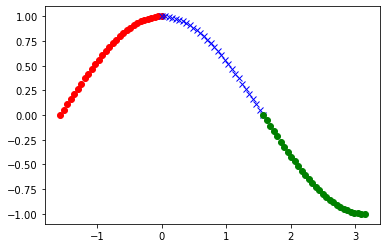

In [24]:
for i in range(len(alpha)):
    plt.plot(alpha[i], np.cos(alpha[i]), mon_format[i])

### Petit exercice simple

Résoudre le système linéaire suivant:

$$\left \{
\begin{array}{rcl}
2x+y-z&=&1 \\
x+2y+z&=&8 \\
3x-y+2z&=&7
\end{array}
\right.$$

Astuce: Utiliser la fonction NumPy np.linalg.solve (voir la documentation officielle)

In [25]:
a = np.array([[2,1,-1], [1,2,1],[3,-1,2]])
b = b = np.array([1,8,7])
x = np.linalg.solve(a, b)
x

array([1., 2., 3.])